In [1]:
ls

classification_CV.ipynb    NUSW-NB15_features.csv
classification.ipynb       RNN.ipynb
KDD_Classification.ipynb   UNSW-NB15.csv
kddcup_corrected.csv       UNSW_NB15_testing-set.csv
kddcup.data.corrected.csv  UNSW_NB15_training-set.csv
KDDTrain+.csv              UNSW_NB15_training-set_selected.csv


In [2]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time

In [3]:
def train_split(data):
    X_train=data.drop(['attack_cat'], axis=1)
    y_train=data['attack_cat']
    return X_train,y_train

data_train = pd.read_csv('./UNSW_NB15_training-set_selected.csv').drop([ 'id', 'label'], axis=1)
#data_test = pd.read_csv('./UNSW_NB15_testing-set.csv').drop([ 'id', 'label'], axis=1)

X_train,Y_train = train_split(data_train)
#X_test,Y_test = train_split(data_test)

#print(Counter(Y))

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

print(Counter(Y_train))
#print(Counter(Y_test))


Counter({'Normal': 37000, 'Generic': 18871, 'Exploits': 11132, 'Fuzzers': 6062, 'DoS': 4089, 'Reconnaissance': 3496, 'Analysis': 677, 'Backdoor': 583, 'Shellcode': 378, 'Worms': 44})


In [4]:
#data_train.plot(kind='area', stacked='true')

In [5]:
def train_split_b(data):
    X_train=data.drop(['label'], axis=1)
    y_train=data['label']
    return X_train,y_train

data_train_b = pd.read_csv('./UNSW_NB15_training-set_selected.csv').drop([ 'id', 'attack_cat'], axis=1)
#data_test = pd.read_csv('./UNSW_NB15_testing-set.csv').drop([ 'id', 'label'], axis=1)

X_train_b,Y_train_b = train_split_b(data_train_b)
#X_test,Y_test = train_split(data_test)

#print(Counter(Y))

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

print(Counter(Y_train_b))
#print(Counter(Y_test))

Counter({1: 45332, 0: 37000})


In [6]:
from sklearn.preprocessing import OneHotEncoder

X1 = X_train.select_dtypes(include=['object'])
ohe = OneHotEncoder()
X1_ohe = pd.DataFrame(ohe.fit_transform(X1).toarray())

print(X1_ohe.shape)

X2 = X_train.select_dtypes(exclude=['object'])
sc = StandardScaler()
X2_sc = pd.DataFrame(sc.fit_transform(X2))
print(X2_sc.shape)

X_train_sc1 = pd.concat([X1_ohe,X2_sc], axis=1, sort=False)
print(X_train_sc1.shape)

(82332, 151)
(82332, 39)
(82332, 190)


In [7]:
from sklearn.preprocessing import OneHotEncoder

X1_b = X_train_b.select_dtypes(include=['object'])
ohe = OneHotEncoder()
X1_ohe_b = pd.DataFrame(ohe.fit_transform(X1_b).toarray())

print(X1_ohe_b.shape)

X2_b = X_train_b.select_dtypes(exclude=['object'])
sc_b = StandardScaler()
X2_sc_b = pd.DataFrame(sc_b.fit_transform(X2_b))
print(X2_sc_b.shape)

X_train_sc1_b = pd.concat([X1_ohe_b,X2_sc_b], axis=1, sort=False)
print(X_train_sc1_b.shape)

(82332, 151)
(82332, 39)
(82332, 190)


In [8]:
#instanciation
sc = StandardScaler()
#X_train_sc = sc.fit_transform(X_train)
#X_test_sc = sc.fit_transform(X_test)

encoder = LabelEncoder()
Y_train_1 = encoder.fit_transform(Y_train)
#Y_test_en = encoder.transform(Y_test)

X_train_sc, X_test_sc, Y_train_en, Y_test_en = train_test_split(X_train_sc1, Y_train_1, test_size=0.1)
print(Counter(Y_train_en))
print(Counter(Y_test_en))

Counter({6: 33319, 5: 16941, 3: 10050, 4: 5414, 2: 3675, 7: 3156, 0: 624, 1: 531, 8: 350, 9: 38})
Counter({6: 3681, 5: 1930, 3: 1082, 4: 648, 2: 414, 7: 340, 0: 53, 1: 52, 8: 28, 9: 6})


In [9]:
Y_train_1_b = Y_train_b
#Y_test_en = encoder.transform(Y_test)

X_train_sc_b, X_test_sc_b, Y_train_en_b, Y_test_en_b = train_test_split(X_train_sc1_b, Y_train_1_b, test_size=0.1)
print(Counter(Y_train_en_b))
print(Counter(Y_test_en_b))

Counter({1: 40870, 0: 33228})
Counter({1: 4462, 0: 3772})


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

param_grid = {'max_depth': [ 800, 1000], 'n_estimators': [ 500,400, 600]}
randomForest_clf = RandomForestClassifier()
grid_search = GridSearchCV(randomForest_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_sc, Y_train_en)
clf1 = grid_search.best_estimator_
print("train accuracy: ", accuracy_score(Y_train_en, clf1.predict(X_train_sc)))
start = time. time()
y_pred_RF = clf1.predict(X_test_sc)
end = time. time()
RF_time=end - start
accuracy_score_RF=accuracy_score(Y_test_en, y_pred_RF)
precision_score_RF=precision_score(Y_test_en, y_pred_RF, average=None)
recall_score_RF=recall_score(Y_test_en, y_pred_RF, average=None)
print("test accuracy: ",accuracy_score_RF )
print("test precision: ", precision_score_RF)
print("test recall: ",recall_score_RF )

train accuracy:  0.9371238090096898
test accuracy:  0.8693223220791839
test precision:  [1.         0.14285714 0.38341969 0.63140496 0.70048309 0.995228
 0.95918905 0.93515358 0.39285714 0.        ]
test recall:  [0.09433962 0.01923077 0.35748792 0.70609982 0.6712963  0.97253886
 0.98967672 0.80588235 0.39285714 0.        ]


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

param_grid = {'max_depth': [ 800, 1000], 'n_estimators': [ 500,400, 600]}
randomForest_clf_b = RandomForestClassifier()
grid_search_b  = GridSearchCV(randomForest_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search_b.fit(X_train_sc_b, Y_train_en_b)
clf1_b = grid_search_b.best_estimator_
print("train accuracy: ", accuracy_score(Y_train_en_b, clf1_b.predict(X_train_sc_b)))
start = time. time()
y_pred_RF_b = clf1_b.predict(X_test_sc_b)
end = time. time()
RF_time_b=end - start
accuracy_score_RF_b=accuracy_score(Y_test_en_b, y_pred_RF_b)
precision_score_RF_b=precision_score(Y_test_en_b, y_pred_RF_b, average=None)
recall_score_RF_b=recall_score(Y_test_en_b, y_pred_RF_b, average=None)
print("test accuracy: ",accuracy_score_RF_b )
print("test precision: ", precision_score_RF_b)
print("test recall: ",recall_score_RF_b )

train accuracy:  0.999946017436368
test accuracy:  0.9778965265970366
test precision:  [0.97137605 0.98350655]
test recall:  [0.98064687 0.97557149]


In [12]:
print(grid_search.best_params_)

{'max_depth': 1000, 'n_estimators': 400}


In [13]:
print(grid_search_b.best_params_)

{'max_depth': 800, 'n_estimators': 600}


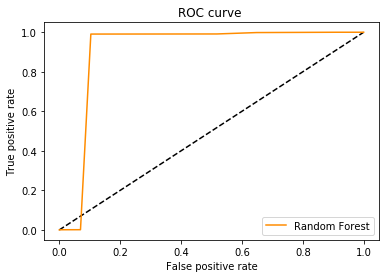

In [14]:
from sklearn.metrics import roc_curve
false_positive, true_positive, _ = roc_curve(Y_test_en, y_pred_RF, pos_label=6)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve ')
plt.legend(loc='best')

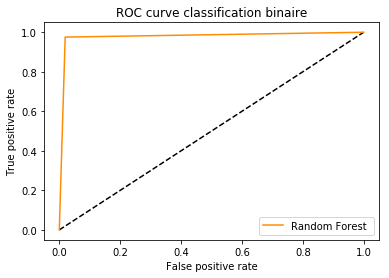

In [18]:
from sklearn.metrics import roc_curve
false_positive_b, true_positive_b, _ = roc_curve(Y_test_en_b, y_pred_RF_b, pos_label=1)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_b, true_positive_b, color='darkorange', label='Random Forest ')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve classification binaire')
plt.legend(loc='best')

In [ ]:
y_pred_de = encoder.inverse_transform(y_pred_RF)
y_pred_de

In [19]:
print(Counter(Y_test_en))
print(Counter(y_pred_RF))

Counter({6: 3681, 5: 1930, 3: 1082, 4: 648, 2: 414, 7: 340, 0: 53, 1: 52, 8: 28, 9: 6})
Counter({6: 3798, 5: 1886, 3: 1210, 4: 621, 2: 386, 7: 293, 8: 28, 1: 7, 0: 5})


Text(204.0, 0.5, 'Valeurs attendues')

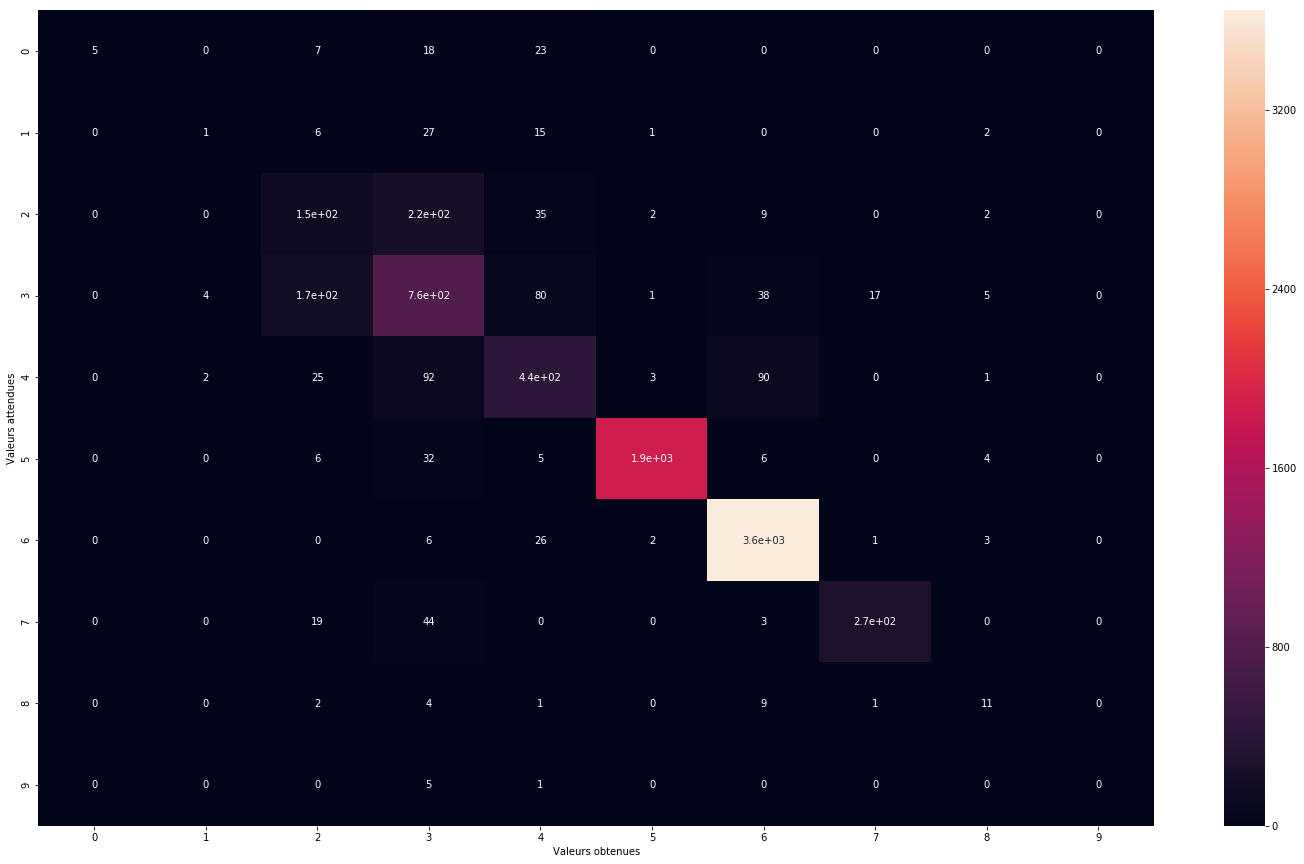

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test_en, y_pred_RF)

%matplotlib inline
import seaborn as sns
plt.figure(figsize=(25,15))
sns.heatmap(cm, annot=True)
plt.xlabel('Valeurs obtenues')
plt.ylabel('Valeurs attendues')

3699 73 109 4353
0.019353128313891833 0.9755714926042134


Text(204.0, 0.5, 'Valeurs attendues')

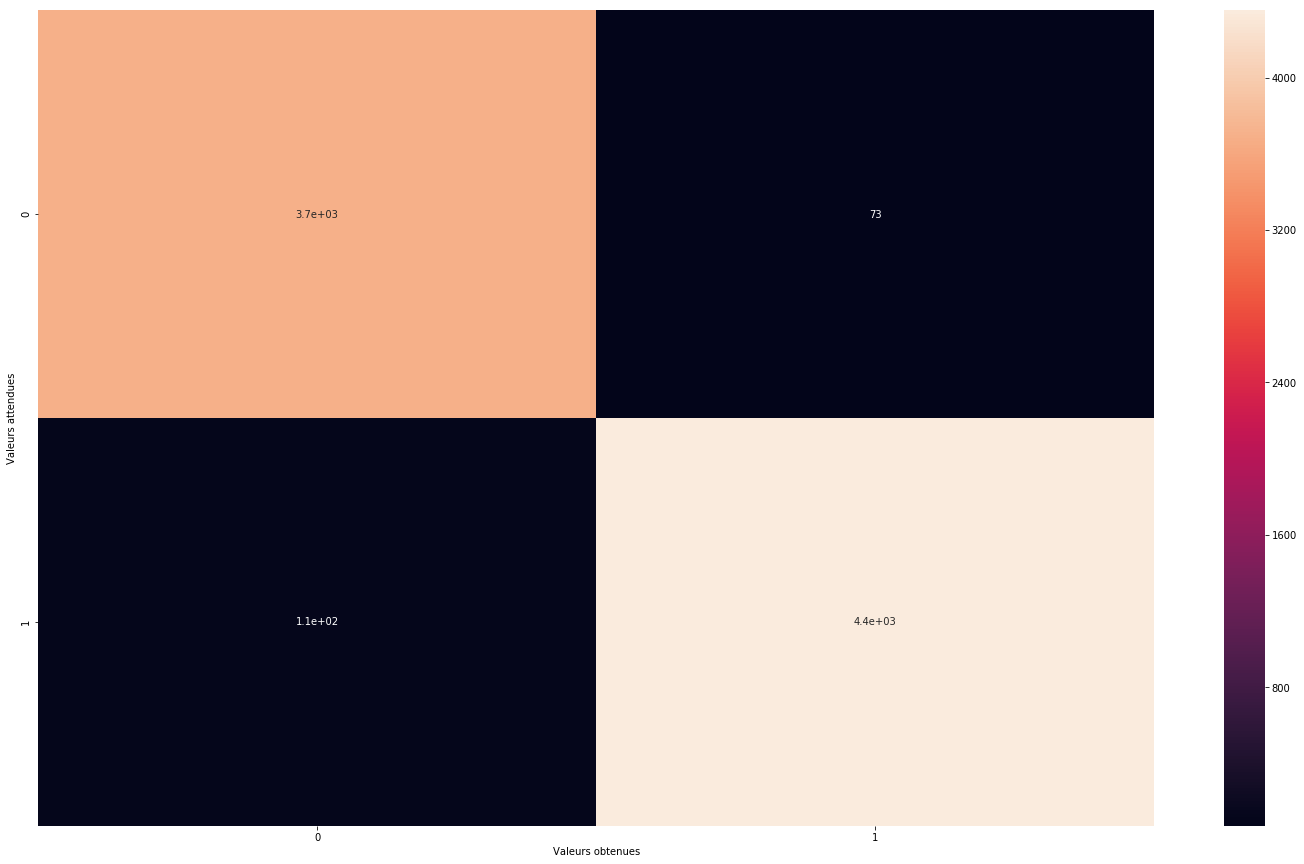

In [38]:
from sklearn.metrics import confusion_matrix
cm_b=confusion_matrix(Y_test_en_b, y_pred_RF_b)

tn, fp, fn, tp = cm_b.ravel()
print(tn, fp, fn, tp)
fpr=fp/(fp+tn)
pr=tp/(tp+fn)
print(fpr,pr)

%matplotlib inline
import seaborn as sns
plt.figure(figsize=(25,15))
sns.heatmap(cm_b, annot=True)
plt.xlabel('Valeurs obtenues')
plt.ylabel('Valeurs attendues')

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

param_grid = {'C': [ 1000, 10000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']}
svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_sc, Y_train_en)
clf2 = grid_search.best_estimator_
start = time. time()
y_pred_SVC = clf2.predict(X_test_sc)
end = time. time()
SVM_time=end - start
accuracy_score_SVM=accuracy_score(Y_test_en, y_pred_SVC)
precision_score_SVM=precision_score(Y_test_en, y_pred_SVC, average=None)
recall_score_SVM=recall_score(Y_test_en, y_pred_SVC, average=None)
print("test accuracy: ",accuracy_score_SVM )
print("test precision: ", precision_score_SVM)
print("test recall: ",recall_score_SVM )

print(grid_search.best_params_)

test accuracy:  0.8609424338110274
test precision:  [0.83333333 0.         0.41111111 0.65259455 0.69269949 0.9910432
 0.9455836  0.82334385 0.34482759 0.        ]
test recall:  [0.09433962 0.         0.4468599  0.6857671  0.62962963 0.9746114
 0.97718011 0.76764706 0.35714286 0.        ]
{'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

param_grid = {'C': [ 1000, 10000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']}
svm_clf_b = SVC()
grid_search_b = GridSearchCV(svm_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search_b.fit(X_train_sc_b, Y_train_en_b)
clf2_b = grid_search_b.best_estimator_
start = time. time()
y_pred_SVC_b = clf2_b.predict(X_test_sc_b)
end = time. time()
SVM_time_b=end - start
accuracy_score_SVM_b=accuracy_score(Y_test_en_b, y_pred_SVC_b)
precision_score_SVM_b=precision_score(Y_test_en_b, y_pred_SVC_b, average=None)
recall_score_SVM_b=recall_score(Y_test_en_b, y_pred_SVC_b, average=None)
print("test accuracy: ",accuracy_score_SVM_b )
print("test precision: ", precision_score_SVM_b)
print("test recall: ",recall_score_SVM_b )

print(grid_search_b.best_params_)

test accuracy:  0.9641729414622298
test precision:  [0.95474758 0.97234187]
test recall:  [0.96765642 0.96122815]
{'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}


Text(204.0, 0.5, 'Valeurs attendues')

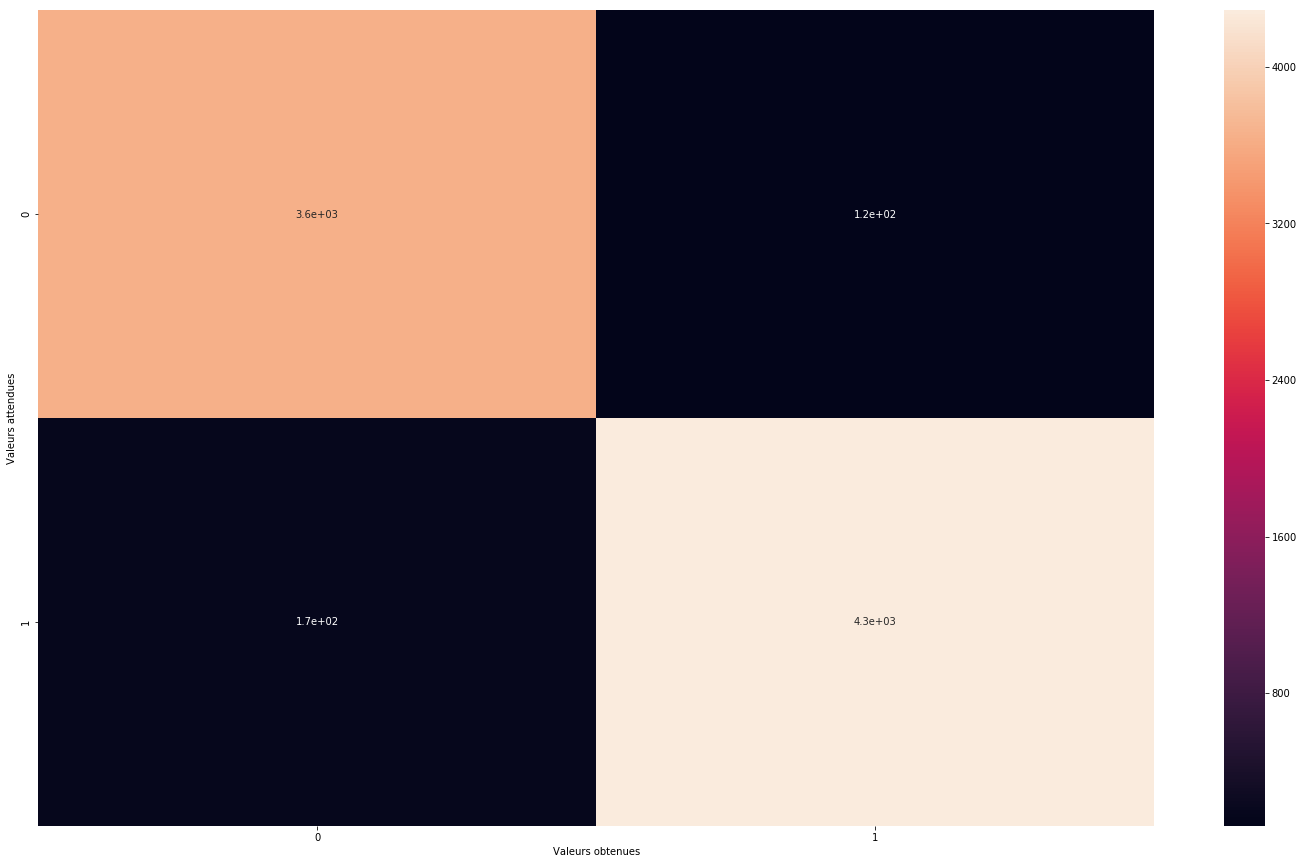

In [24]:
cm_SVC_b=confusion_matrix(Y_test_en_b, y_pred_SVC_b)

%matplotlib inline
import seaborn as sns
plt.figure(figsize=(25,15))
sns.heatmap(cm_SVC_b, annot=True)
plt.xlabel('Valeurs obtenues')
plt.ylabel('Valeurs attendues')

Text(204.0, 0.5, 'Valeurs attendues')

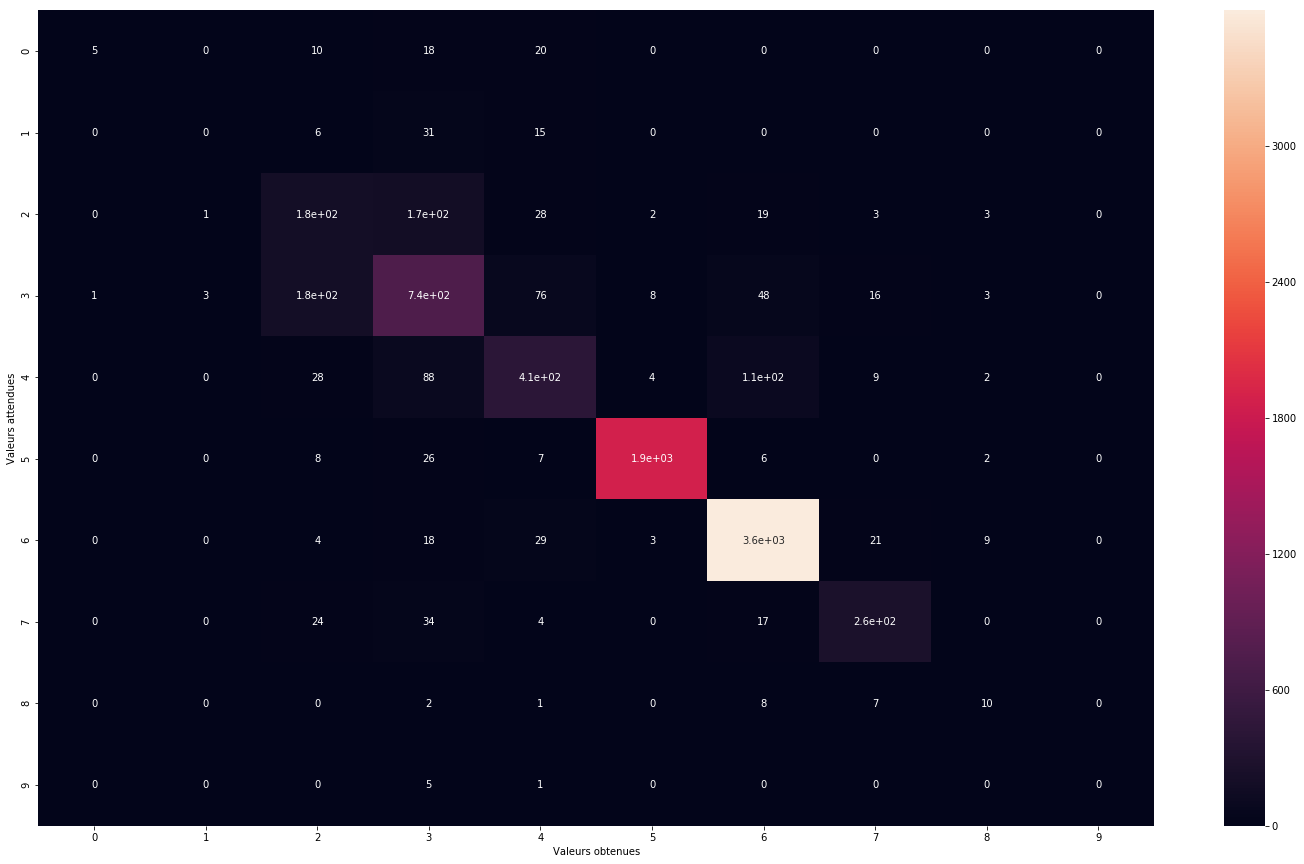

In [25]:
y_pred_de = encoder.inverse_transform(y_pred_SVC)
cm_SVC=confusion_matrix(Y_test_en, y_pred_SVC)

%matplotlib inline
import seaborn as sns
plt.figure(figsize=(25,15))
sns.heatmap(cm_SVC, annot=True)
plt.xlabel('Valeurs obtenues')
plt.ylabel('Valeurs attendues')

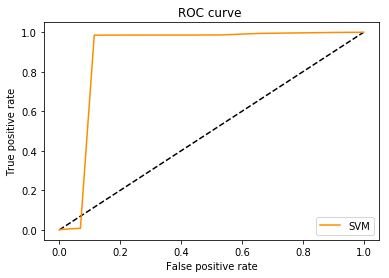

In [26]:
false_positive, true_positive, _ = roc_curve(Y_test_en, y_pred_SVC, pos_label=6)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive, true_positive, color='darkorange', label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve ')
plt.legend(loc='best')

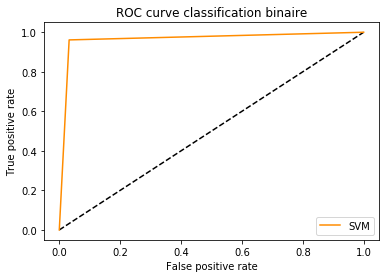

In [27]:
false_positive_b, true_positive_b, _ = roc_curve(Y_test_en_b, y_pred_SVC_b, pos_label=1)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_b, true_positive_b, color='darkorange', label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve classification binaire')
plt.legend(loc='best')

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

gnb_clf = GaussianNB()
param_grid = {}
grid_search = GridSearchCV(gnb_clf, param_grid,cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_sc, Y_train_en)
clf6 = grid_search.best_estimator_
start = time. time()
y_pred_G = clf6.predict(X_test_sc)
end = time. time()
NB_time=end - start
accuracy_score_NB=accuracy_score(Y_test_en, y_pred_G)
precision_score_NB=precision_score(Y_test_en, y_pred_G, average=None)
recall_score_NB=recall_score(Y_test_en, y_pred_G, average=None)
print("train accuracy: ", accuracy_score(Y_train_en, clf6.predict(X_train_sc)))
print("test accuracy: ",accuracy_score_NB )
print("test precision: ",precision_score_NB)
print("test recall: ",recall_score_NB )

train accuracy:  0.5698534373397393
test accuracy:  0.5765120233179499
test precision:  [0.05037783 0.05128205 0.55555556 0.89090909 0.5        0.91633858
 0.77326233 0.04261364 0.02106847 0.01330377]
test recall:  [0.37735849 0.03846154 0.01207729 0.04528651 0.00154321 0.96476684
 0.74952459 0.04411765 1.         1.        ]


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

gnb_clf_b = GaussianNB()
param_grid = {}
grid_search_b = GridSearchCV(gnb_clf_b, param_grid,cv=10, scoring='neg_mean_squared_error')

grid_search_b.fit(X_train_sc_b, Y_train_en_b)
clf6_b = grid_search_b.best_estimator_
start = time. time()
y_pred_G_b = clf6_b.predict(X_test_sc_b)
end = time. time()
NB_time_b=end - start
accuracy_score_NB_b=accuracy_score(Y_test_en_b, y_pred_G_b)
precision_score_NB_b=precision_score(Y_test_en_b, y_pred_G_b, average=None)
recall_score_NB_b=recall_score(Y_test_en_b, y_pred_G_b, average=None)
print("train accuracy: ", accuracy_score(Y_train_en_b, clf6_b.predict(X_train_sc_b)))
print("test accuracy: ",accuracy_score_NB_b )
print("test precision: ",precision_score_NB_b)
print("test recall: ",recall_score_NB_b )

train accuracy:  0.6515155604739669
test accuracy:  0.6610395919358757
test precision:  [0.57475995 0.99940227]
test recall:  [0.99973489 0.37471986]


Text(204.0, 0.5, 'Valeurs attendues')

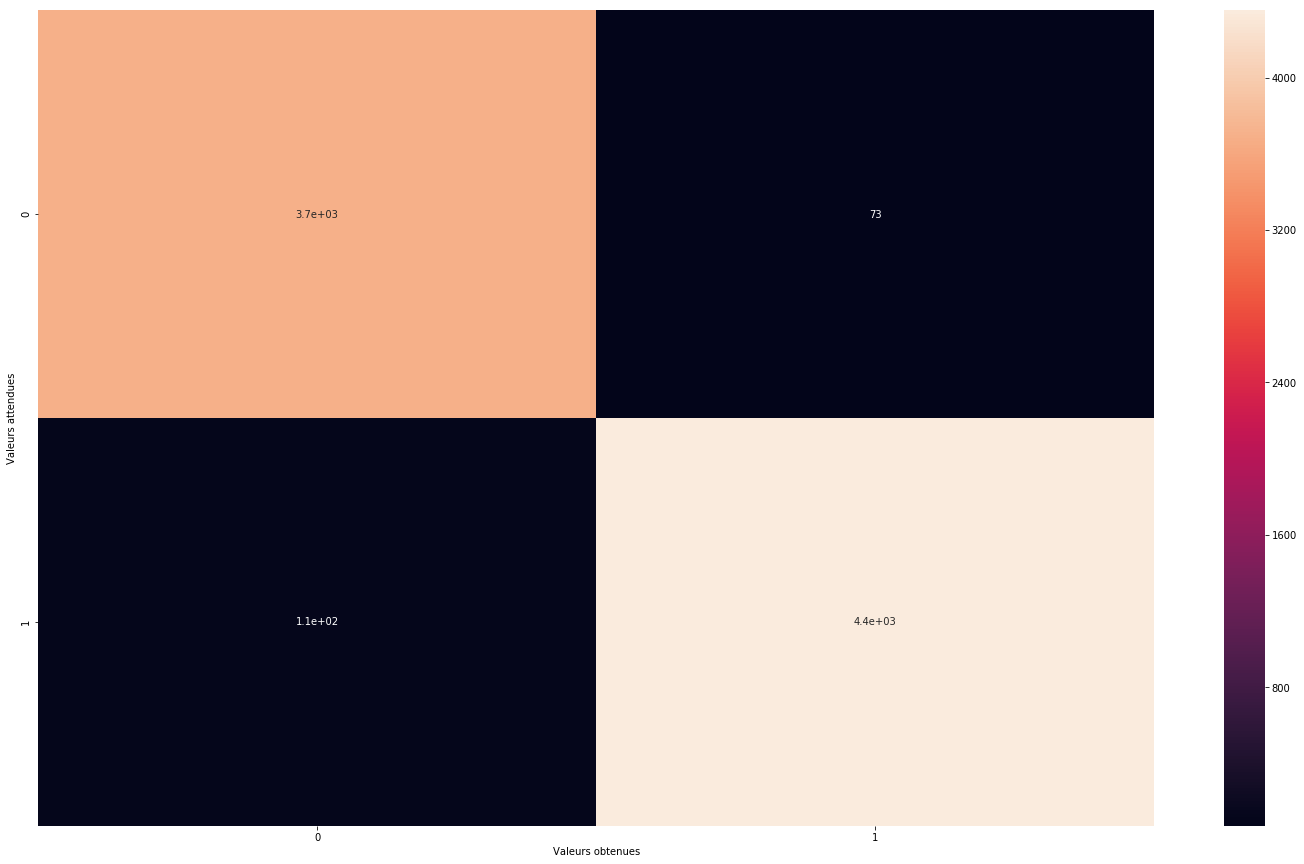

In [30]:
cm_G_b=confusion_matrix(Y_test_en_b, y_pred_RF_b)

%matplotlib inline
import seaborn as sns
plt.figure(figsize=(25,15))
sns.heatmap(cm_G_b, annot=True)
plt.xlabel('Valeurs obtenues')
plt.ylabel('Valeurs attendues')

Text(204.0, 0.5, 'Valeurs attendues')

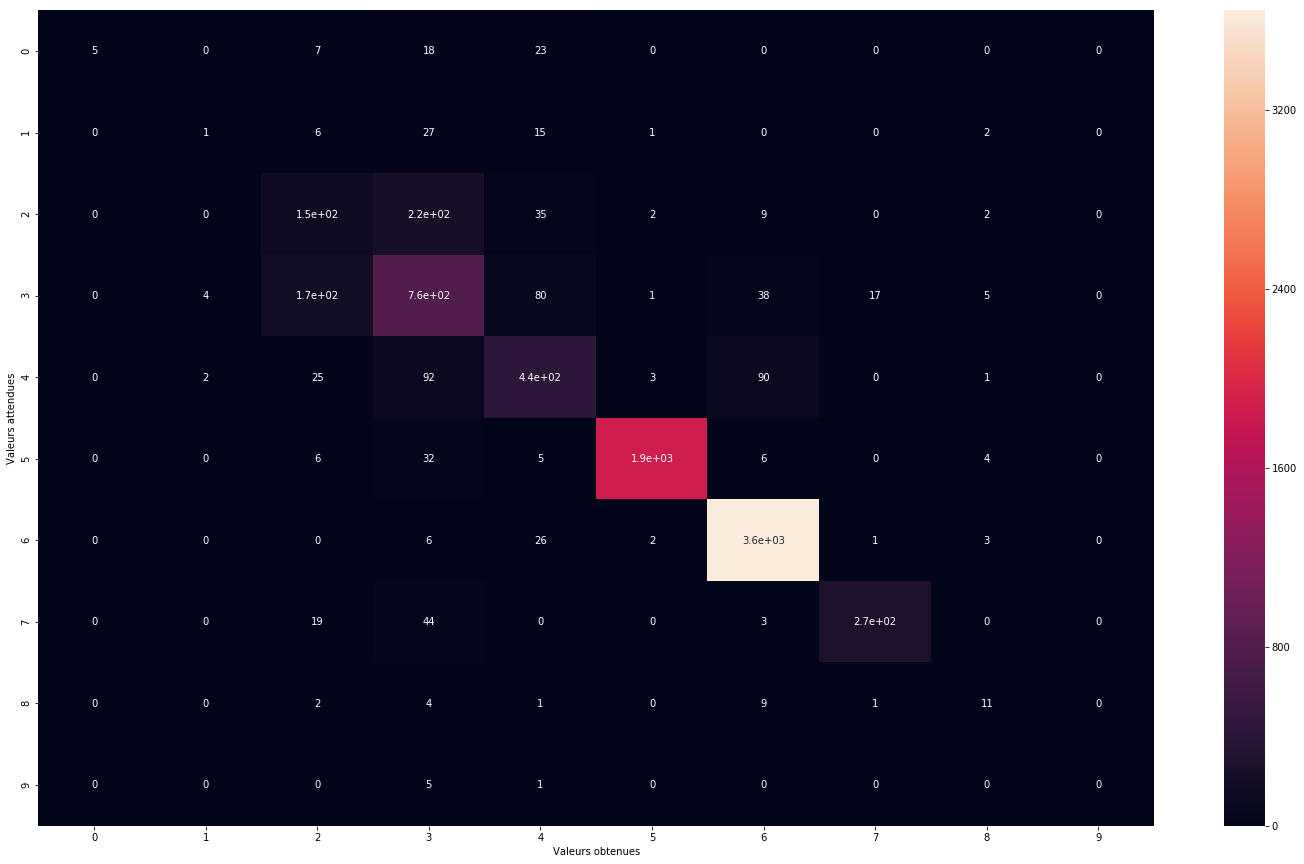

In [31]:
cm_G=confusion_matrix(Y_test_en, y_pred_RF)

%matplotlib inline
import seaborn as sns
plt.figure(figsize=(25,15))
sns.heatmap(cm_G, annot=True)
plt.xlabel('Valeurs obtenues')
plt.ylabel('Valeurs attendues')

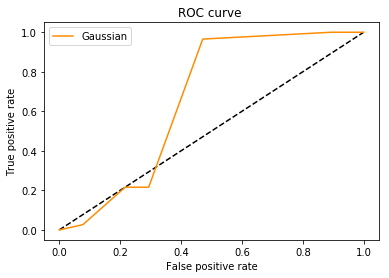

In [32]:
false_positive, true_positive, _ = roc_curve(Y_test_en, y_pred_G, pos_label=6)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive, true_positive, color='darkorange', label='Gaussian')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve ')
plt.legend(loc='best')

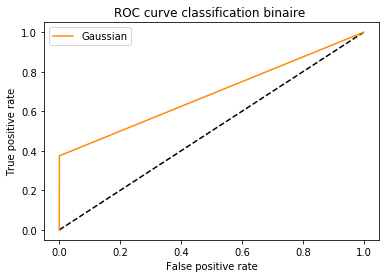

In [33]:
false_positive_b, true_positive_b, _ = roc_curve(Y_test_en_b, y_pred_G_b, pos_label=1)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_b, true_positive_b, color='darkorange', label='Gaussian')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve classification binaire ')
plt.legend(loc='best')

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

param_grid = {'max_depth': [10, 50, 100, 500, 1000]}
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=10
                           , scoring='neg_mean_squared_error')

grid_search.fit(X_train_sc, Y_train_en)
clf4 = grid_search.best_estimator_
start = time. time()
y_pred_DT = clf4.predict(X_test_sc)
end = time. time()
DT_time=end - start
accuracy_score_DT=accuracy_score(Y_test_en, y_pred_DT)
precision_score_DT= precision_score(Y_test_en, y_pred_DT, average=None)
recall_score_DT=recall_score(Y_test_en, y_pred_DT, average=None)
print("test accuracy: ", accuracy_score_DT)
print("test precision: ",precision_score_DT)
print("test recall: ", recall_score_DT)

print(grid_search.best_params_)

test accuracy:  0.8598494049064853
test precision:  [0.5        0.         0.39278937 0.61759425 0.69502408 0.98593017
 0.96824104 0.8778135  0.4375     0.        ]
test recall:  [0.11320755 0.         0.5        0.63585952 0.66820988 0.98031088
 0.96903015 0.80294118 0.5        0.        ]
{'max_depth': 1000}


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

param_grid = {'max_depth': [10, 50, 100, 500, 1000]}
tree_clf_b = DecisionTreeClassifier()
grid_search_b = GridSearchCV(tree_clf_b, param_grid, cv=10
                           , scoring='neg_mean_squared_error')

grid_search_b.fit(X_train_sc_b, Y_train_en_b)
clf4_b = grid_search_b.best_estimator_
start = time. time()
y_pred_DT_b = clf4_b.predict(X_test_sc_b)
end = time. time()
DT_time_b=end - start
accuracy_score_DT_b=accuracy_score(Y_test_en_b, y_pred_DT_b)
precision_score_DT_b= precision_score(Y_test_en_b, y_pred_DT_b, average=None)
recall_score_DT_b=recall_score(Y_test_en_b, y_pred_DT_b, average=None)
print("test accuracy: ", accuracy_score_DT_b)
print("test precision: ",precision_score_DT_b)
print("test recall: ", recall_score_DT_b)

print(grid_search_b.best_params_)

test accuracy:  0.9662375516152538
test precision:  [0.96364119 0.96842812]
test recall:  [0.9626193  0.96929628]
{'max_depth': 100}


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20, 30]}
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_sc, Y_train_en)
clf5 = grid_search.best_estimator_
start = time. time()
y_pred_KNN = clf5.predict(X_test_sc)
end = time. time()
KNN_time=end - start
accuracy_score_KNN=accuracy_score(Y_test_en, y_pred_KNN)
precision_score_KNN=precision_score(Y_test_en, y_pred_KNN, average=None)
recall_score_KNN=recall_score(Y_test_en, y_pred_KNN, average=None)
print("test accuracy: ", accuracy_score_KNN)
print("test precision: ",precision_score_KNN )
print("test recall: ",recall_score_KNN )

print(grid_search.best_params_)

test accuracy:  0.817342725285402
test precision:  [0.05263158 0.         0.39528024 0.60218671 0.5334873  0.99361362
 0.875      0.70881226 0.5        0.        ]
test recall:  [0.01886792 0.         0.3236715  0.66173752 0.35648148 0.96735751
 0.97555012 0.54411765 0.17857143 0.        ]
{'n_neighbors': 10}


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20, 30]}
knn_clf_b = KNeighborsClassifier()
grid_search_b = GridSearchCV(knn_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search_b.fit(X_train_sc_b, Y_train_en_b)
clf5_b = grid_search_b.best_estimator_
start = time. time()
y_pred_KNN_b = clf5_b.predict(X_test_sc_b)
end = time. time()
KNN_time=end - start
accuracy_score_KNN_b=accuracy_score(Y_test_en_b, y_pred_KNN_b)
precision_score_KNN_b=precision_score(Y_test_en_b, y_pred_KNN_b, average=None)
recall_score_KNN_b=recall_score(Y_test_en_b, y_pred_KNN_b, average=None)
print("test accuracy: ", accuracy_score_KNN_b)
print("test precision: ",precision_score_KNN_b)
print("test recall: ",recall_score_KNN_b)

print(grid_search_b.best_params_)

test accuracy:  0.9347826086956522
test precision:  [0.9056935  0.96209089]
test recall:  [0.95731707 0.91573286]
{'n_neighbors': 5}


In [ ]:
x1 = [1.    ,     0.2    ,    0.38256659, 0.62248996, 0.6875  ,   0.99777159,
 0.96192227, 0.91973244 ,0.56   ,    0.        ]
x2 = [0.08333333 ,0.  ,       0.38386308 ,0.59497908 ,0.52421053, 0.9955157,
 0.87848411, 0.70428016, 0.58333333, 0.        ]
x3 = [0.8   ,     0.    ,     0.43888889, 0.62172573, 0.78153153 ,0.99225664,
 0.9408867 , 0.98425197, 0.46428571, 0.        ]
x4 = [0.75    ,   0.      ,   0.41137856, 0.64811644 ,0.68488746, 0.99056604,
 0.95052356, 0.78851964, 0.48148148, 0.        ]
y=[0,1,2,3,4,5,6,7,8,9]
plt.plot(y, x1, label="RF")
plt.plot(y, x2, label="KNN")
plt.plot(y, x3, label="DT")
plt.plot(y, x4, label="SVM")
plt.ylabel('Precison')
plt.xlabel('Classes')
plt.title('Comparaison')
plt.tight_layout()
plt.grid()
plt.legend()

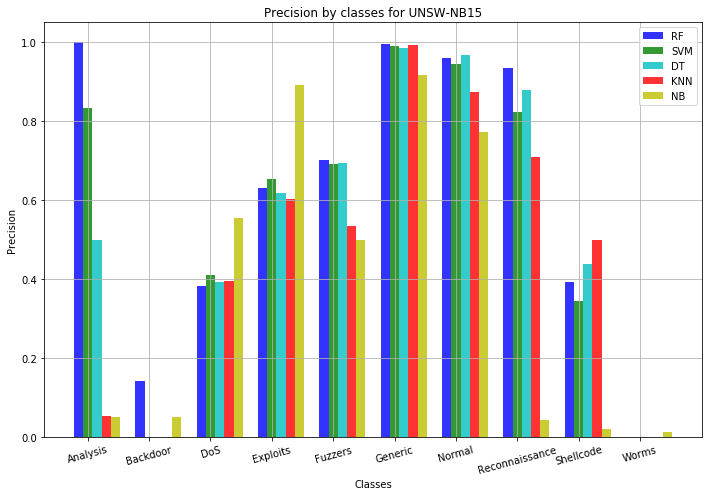

In [56]:
# data to plot
n_groups = 10
# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, precision_score_RF, bar_width,
alpha=opacity,
color='b',
label='RF')

rects2 = plt.bar(index + bar_width, precision_score_SVM, bar_width,
alpha=opacity,
color='g',
label='SVM')

rects3 = plt.bar(index+ 2*bar_width, precision_score_DT, bar_width,
alpha=opacity,
color='c',
label='DT')

rects4 = plt.bar(index + 3*bar_width, precision_score_KNN, bar_width,
alpha=opacity,
color='r',
label='KNN')

rects5 = plt.bar(index+ 4*bar_width, precision_score_NB, bar_width,
alpha=opacity,
color='y',
label='NB')



plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision by classes for UNSW-NB15')
plt.xticks(index + bar_width, ('Analysis','Backdoor', 'DoS', 'Exploits', 'Fuzzers','Generic', 'Normal', 'Reconnaissance', 'Shellcode','Worms'),rotation='15')
plt.legend()

plt.tight_layout()
plt.grid()

In [53]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_test_en_b, y_pred_RF_b).ravel()
fpr=fp/(fp+tn)
print("fpr RF: ",fpr)

tn, fp, fn, tp = confusion_matrix(Y_test_en_b, y_pred_SVC_b).ravel()
fpr=fp/(fp+tn)
print("fpr SVM: ",fpr)

tn, fp, fn, tp = confusion_matrix(Y_test_en_b, y_pred_G_b).ravel()
fpr=fp/(fp+tn)
print("fpr NB: ",fpr)

tn, fp, fn, tp = confusion_matrix(Y_test_en_b, y_pred_DT_b).ravel()
fpr=fp/(fp+tn)
print("fpr DT: ",fpr)

tn, fp, fn, tp = confusion_matrix(Y_test_en_b, y_pred_KNN_b).ravel()
fpr=fp/(fp+tn)
print("fpr KNN: ",fpr)

fpr RF:  0.019353128313891833
fpr SVM:  0.03234358430540827
fpr NB:  0.0002651113467656416
fpr DT:  0.03738069989395546
fpr KNN:  0.042682926829268296
